
# Probably and Statistics: Final Project
## Video game reviews/sales and Probability Analytics
***

**Team:** 
Laura Pantleo; Jacob (Jake) Henson


***

This assignment is the notebook for our final project on video games. We are using data from https://corgis-edu.github.io/corgis/csv/video_games/ in order to get a look at metacritic score, console, publisher, and see how this all relates

Through this notebook we will be exploring topics such as:
- What are the most popular genres for Nintendo/Ubisoft/EA/Activision/Sega/Ubisoft/Capcom/Etc4
- What are the most popular genres for each console?
- Does metacritic score have an effect on used price? How does this relate to when the game was released?
- Does a game's length correspond to a higher Metacritic score?

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline


## CSV File Introduction
*** 
Video games! They're a fun, creative, and stimulating hobby that allows for individuals to take a break from reality and immerse in fantasy worlds--but what makes a good video game? 

A bit of background: 

  - This data was collected via the CORGIS project from: https://corgis-edu.github.io/corgis/csv/video_games/
  - It relates to games released from 2004-2010, and consists of over 1000 individual video games. While the information itself may be a tad older, there is important things we can learn from it. 

Below is a sample of data we have from video games released between 2004 and 2010. We chose a dataset from these years because in the 12-16 years they have been out, many have cemented themselves in geek culture and have made or broken various producers and consoles. Additionally, it allows us to analyze more data such as resale value and see how many people have played the game over the years. 
The data contains information pertaining to Console, Publisher, Genre, Metacritic Review scores, resale price and story length among other things. 

In [15]:
filepath = 'video_gamesEdit1.csv'
df = pd.read_csv(filepath)
df.head()

,Title,Features.Handheld?,Features.Max Players,Features.Multiplatform?,Features.Online?,Metadata.Genres,Metadata.Licensed?,Metadata.Publishers,Metadata.Sequel?,Metrics.Review Score,...,Length.Main + Extras.Average,Length.Main + Extras.Leisure,Length.Main + Extras.Median,Length.Main + Extras.Polled,Length.Main + Extras.Rushed,Length.Main Story.Average,Length.Main Story.Leisure,Length.Main Story.Median,Length.Main Story.Polled,Length.Main Story.Rushed
0,Super Mario 64 DS,True,1,True,True,Action,True,Nintendo,True,85,...,24.916667,29.966667,25.000000,16,18.333333,14.333333,18.316667,14.500000,21,9.700000
1,Lumines: Puzzle Fusion,True,1,True,True,Strategy,True,Ubisoft,True,89,...,9.750000,9.866667,9.750000,2,9.616667,10.333333,11.083333,10.000000,3,9.583333
2,WarioWare Touched!,True,2,True,True,Racing / Driving,True,Nintendo,True,81,...,3.850000,5.666667,3.333333,11,2.783333,1.916667,2.933333,1.833333,30,1.433333
3,Hot Shots Golf: Open Tee,True,1,True,True,Sports,True,Sony,True,81,...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0,0.000000
4,Spider-Man 2,True,1,True,True,Action,True,Activision,True,61,...,12.766667,17.316667,12.500000,12,10.483333,8.350000,11.083333,8.000000,23,5.333333




**Checking and Cleaning the Dataset**



In [16]:
file_path = 'video_gamesEdit1.csv'
dfDirtyGames = pd.read_csv(file_path)
dfDirtyGames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Data columns (total 36 columns):
Title                            1212 non-null object
Features.Handheld?               1212 non-null bool
Features.Max Players             1212 non-null int64
Features.Multiplatform?          1212 non-null bool
Features.Online?                 1212 non-null bool
Metadata.Genres                  1212 non-null object
Metadata.Licensed?               1212 non-null bool
Metadata.Publishers              948 non-null object
Metadata.Sequel?                 1212 non-null bool
Metrics.Review Score             1212 non-null int64
Metrics.Sales                    1212 non-null float64
Metrics.Used Price               1212 non-null float64
Release.Console                  1212 non-null object
Release.Rating                   1212 non-null object
Release.Re-release?              1212 non-null bool
Release.Year                     1212 non-null int64
Length.All PlayStyles.Average    1212 non-n

As you can see above, there are many games missing their info on Publishers. We only want the information for the 948 games with a complete data set, and so we are going to exclude the 264 games that do not include that information.



In [17]:
file_path = 'video_gamesEdit1.csv'
dfDirtyGames = pd.read_csv(file_path)
#dfDirtyGames.info()

dfCleanGames = dfDirtyGames.dropna(subset=["Metadata.Publishers"]).copy() #.to drop all rows with missing values in a subset of the columns, pass the subset parameter to .dropna() along with a list of column names of the subset
dfCleanGames.info() #To see the new "clean" data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 948 entries, 0 to 1205
Data columns (total 36 columns):
Title                            948 non-null object
Features.Handheld?               948 non-null bool
Features.Max Players             948 non-null int64
Features.Multiplatform?          948 non-null bool
Features.Online?                 948 non-null bool
Metadata.Genres                  948 non-null object
Metadata.Licensed?               948 non-null bool
Metadata.Publishers              948 non-null object
Metadata.Sequel?                 948 non-null bool
Metrics.Review Score             948 non-null int64
Metrics.Sales                    948 non-null float64
Metrics.Used Price               948 non-null float64
Release.Console                  948 non-null object
Release.Rating                   948 non-null object
Release.Re-release?              948 non-null bool
Release.Year                     948 non-null int64
Length.All PlayStyles.Average    948 non-null float64
Lengt

Now we have our new, clean dataset! Defined as dcCleanGames!



**Examining the Relationship between Genres and Success**

Some consoles and publishers such as Nintendo have a stereotype of being for a younger or more family based audience while other consoles such as the PSP, PlayStation, and Xbox are thought to target more teen/adult audiences. Furthermore, genres such as Action and Horror tend to be more associated with older audiences.

Therefore, we thought it would be interesting to explore the relationship between genre and console to see if the stereotypes stand true. Later, we will address this data again to observe whether this has an effect on the success of the games selling and therefore the success of the game publishers and consoles.



**Part One: Popularity of Different Genres on Each Console**



^^ insert more cells above this line
___
<span style="color:green">*Jake's Part - remove this text later*</span> 


### Review Scores and Games Analysis

**Examining the reviews and factors around a game's overall perception, regardless of console or genre**


**Part ???:**  *Does metacritic score have an effect on used price?* 
 
It makes sense initially that a game's review score would affect its initial sales, but what about used price? After people have already played a game and want to sell it, would the second-hand market be affected by negative reviews? 
In order to properly answer this question, I'll graph the used price as y-axis, and the metacritic score as x-axis. This will allow for a visual representation of what (if any) correlation exists there is between these two variables. 

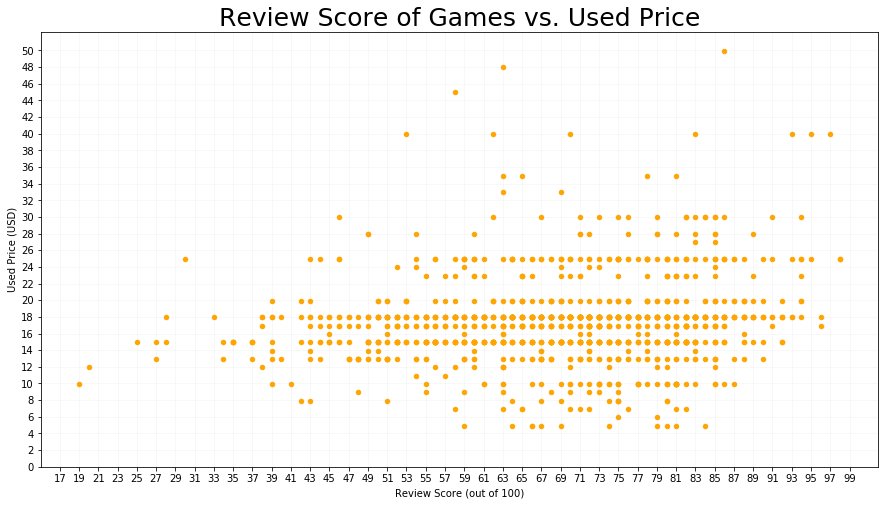

In [18]:
#print(dfDirtyGames["Metrics.Used Price"].describe())
#print(dfDirtyGames["Metrics.Review Score"].describe())

#note - using dfDirtyGames because I don't care about publisher for this case
# - technically, I could just do the ones with no publisher listed, but because this isn't relevant, 
maxScore = np.amax(dfDirtyGames["Metrics.Review Score"])
minScore = np.amin(dfDirtyGames["Metrics.Review Score"])
maxPrice = np.amax(dfDirtyGames["Metrics.Used Price"])

fig, ax = plt.subplots(figsize=(15,8))

ax.set_title("Review Score of Games vs. Used Price",fontsize=25)
ax.set_ylabel("Used Price (USD)")
ax.set_xlabel("Review Score (out of 100)")

xAxis = dfDirtyGames["Metrics.Review Score"]
yAxis = dfDirtyGames["Metrics.Used Price"]

ax.scatter(xAxis, yAxis, color='orange', s=20)

plt.xticks(np.arange(minScore-2, 100, 2)) #put ticks in the x-axis at 5 instead of like 20 
plt.yticks(np.arange(0, maxPrice + 2, 2)) #put ticks in y-axis to see more 
ax.grid(alpha=0.1)

plt.show()

From ths plot, there initially appears no extremely obvious correlations to be drawn between review score and sales. This data shows no obvious trends about reviews as they relate to used price. To answer the original question, it does not appear there is any obvious relationships between these two variables. This suggests that perhaps a game's perception upon review and its used price do not in fact correlate in general. 


There are other factors (like year released) which could correspond to a game's used price, but given that this dataset only consists of six years of games, it seems like our time may be better spent elsewhere.


-- 




What about the length of a game? Is there any correllation between metacritic score and how long a game is? Or rather...

**Part ???:**  *Does game's review score correlate to length?* 

To answer this, I will create a 2 similar plots, this time with the length on the x-axis and score on the y-axis.

Important distinctions to note: 

    - "Main Story Length" refers to how long it takes a player to beat the mean story
    - "Total length" refers to the time which a game took to complete 100%, including achievements, etc. 


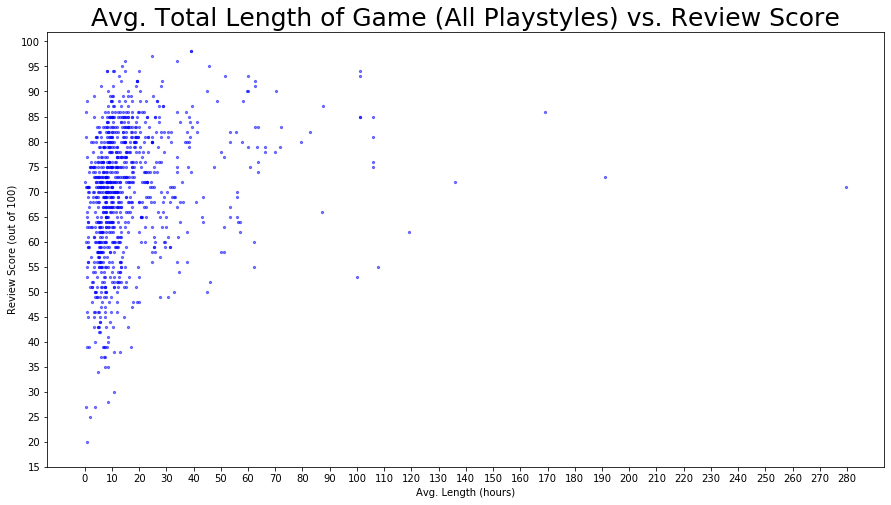

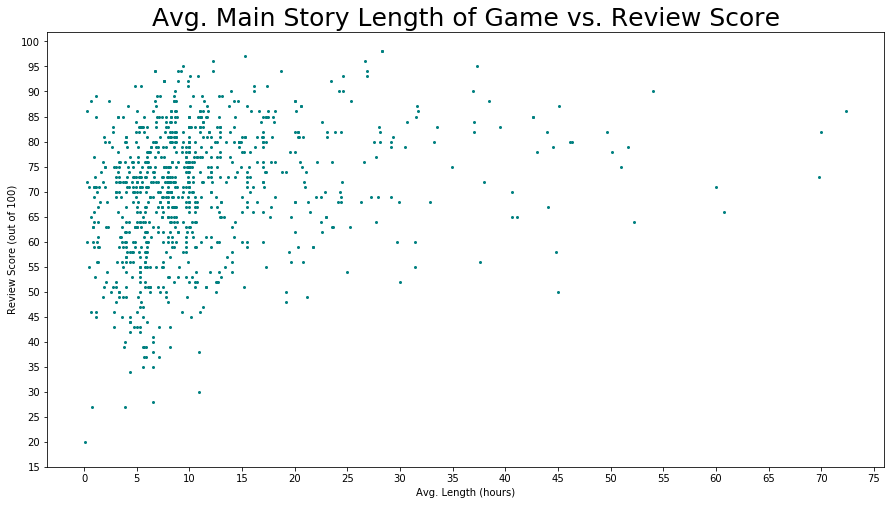

Mean total length of game (all playstyles): 13.7
Mean story length of game: 8.5


In [19]:
################
# Total Length:
################

#Filter out all of the data for length which is 0.0, since this is empty/missing data: 
dfCleanLengthGames =  dfDirtyGames[(dfDirtyGames['Length.All PlayStyles.Average'] != 0.0)]

maxScore = np.amax(dfDirtyGames["Metrics.Review Score"])
minScore = np.amin(dfDirtyGames["Metrics.Review Score"])
maxLength = np.amax(dfDirtyGames['Length.All PlayStyles.Average'])
minLength = np.amax(dfDirtyGames['Length.All PlayStyles.Average'])


fig, ax = plt.subplots(figsize=(15,8))

ax.set_title("Avg. Total Length of Game (All Playstyles) vs. Review Score",fontsize=25)
ax.set_ylabel("Review Score (out of 100)")
ax.set_xlabel("Avg. Length (hours)")

yAxis = dfCleanLengthGames["Metrics.Review Score"]
xAxis = dfCleanLengthGames['Length.All PlayStyles.Average']

ax.scatter(xAxis, yAxis, color='blue', s=5, alpha = 0.5)

plt.yticks(np.arange(minScore-4, 101, 5)) #put ticks in the x-axis at 5 instead of like 20 
plt.xticks(np.arange(0, maxLength + 5, 10)) #put ticks in y-axis to see more 

##################
#Second Plot; Main Story Length:
##################

#Filter out all of the data for length which is 0.0, since this is empty/missing data: 
dfCleanLengthGamesSt =  dfDirtyGames[(dfDirtyGames['Length.Main Story.Average'] != 0.0)]

maxScore = np.amax(dfDirtyGames["Metrics.Review Score"])
minScore = np.amin(dfDirtyGames["Metrics.Review Score"])
maxLength = np.amax(dfCleanLengthGamesSt['Length.Main Story.Average'])
minLength = np.amax(dfCleanLengthGamesSt['Length.Main Story.Average'])


fig, ax = plt.subplots(figsize=(15,8))

ax.set_title("Avg. Main Story Length of Game vs. Review Score",fontsize=25)
ax.set_ylabel("Review Score (out of 100)")
ax.set_xlabel("Avg. Length (hours)")

yAxis = dfCleanLengthGamesSt["Metrics.Review Score"]
xAxis = dfCleanLengthGamesSt['Length.Main Story.Average']

ax.scatter(xAxis, yAxis, color='teal', s=4)

plt.yticks(np.arange(minScore-4, 101, 5)) #put ticks in the x-axis at 5 instead of like 20 
plt.xticks(np.arange(0, maxLength + 5, 5)) #put ticks in y-axis to see more 

plt.show()

meanLen = round(np.mean(dfDirtyGames['Length.All PlayStyles.Average']), 1)
meanStry = round(np.mean(dfDirtyGames['Length.Main Story.Average']), 1)
print("Mean total length of game (all playstyles):", meanLen)
print("Mean story length of game:", meanStry)

What's interesting to note is that regardless of playstyle or main story length, both of the data sets seem to have a few commonalities. Even though there is no obvious correlation or relationship between story length, playtime, and review score, there seems to be a few noteworthy takeaways from these visualizations of the data: 
 
 - **1. Games that score very low (roughly under 50) never seem to take longer than 15 to 20 hours to beat.** This suggests that if a game has a longer story campaign, it is likely that it will review somewhere above 50. Players generally think favorably about games with longer story campaigns or that take them longer to complete. 
 
 - **2. Games that score very high (90 or above) can vary in length, but usually don't take more than 100 hours to fully complete, or have a main story which is longer than 40 hours.** This suggests that perhaps there is a cutoff for the best games, meaning that a longer game doesn't always equal a better score. Notice how a lot of the data tends to be clustered in the 1-20hr mark all throughout, suggesting there exists plenty of games which are shorter (10-20 hours) yet score very well.
 
 - **3. Games that score very high (90 or above) don't seem to take less than 5 hours to complete**. Again, this points toward a balance in story length. A game that is too short to fully beat will leave audiences wanting more. They may not like the game if it is underdeveloped or feel upset if the game only takes a few hours to master. 
 
 
 
*What does this tell us about the relationship between how a game is reviewed and its length?* While generally, games tend to be around 14 hours hours to complete and 9 hours for the main story, The highest-reviewed games seem to be those which are not too short (5 or less hours) but generally not overly-long (more than 5-20 hours). However, plenty of games that are within this range and score wildly different, meaning that there are additional factors which are important to a game's success. 

--


Another important question to ask:

**Part ???:**  *Does game's ESRB rating correlate to review score?* 

One of the important things to note is that a game's review has a large effect on the audience who plays the game. Games rated E (*Everyone*) cater to everyone (or sometimes younger audiences) while while M-rated (*Mature*) games cater to exclusively adults - but is there any correlation between a game's rating and how well it scores? 


Before jumping into this, it's important to get a good sense of the games we're working with, to see how many games have a certain rating. I'll make a frequency histogram on ratings to get a better idea of how many games are rated what: 

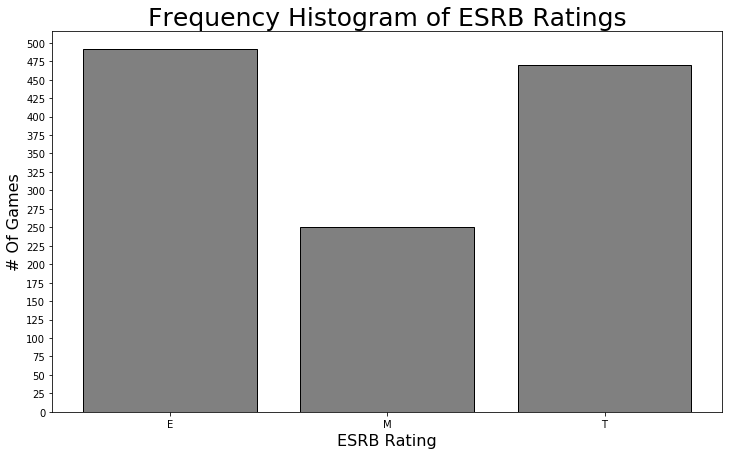

Number of categories: 3
Games Rated E:  491
Games Rated T:  470
Games Rated M:  251
Number of games total: 1212


In [20]:
#A little help with histogram from string values from StackOverflow: https://stackoverflow.com/questions/28418988/how-to-make-a-histogram-from-a-list-of-strings-in-python

bins = np.arange(0, 525, step=25)


fig, ax = plt.subplots(figsize=(12,7))

labels, counts = np.unique(dfDirtyGames["Release.Rating"],return_counts=True)
ticks = range(len(counts))

ax.set_title("Frequency Histogram of ESRB Ratings",fontsize=25)
ax.set_ylabel("# Of Games", fontsize=16)
ax.set_xlabel("ESRB Rating", fontsize=16)


plt.bar(ticks,counts, align='center', fc="gray", ec="black")
plt.xticks(ticks, labels)
plt.yticks(bins)

plt.show()

print("Number of categories:", dfDirtyGames["Release.Rating"].nunique())
#There are three categories of ratings: E, T, and M
print("Games Rated E: ",  (dfDirtyGames["Release.Rating"] =="E").sum())
print("Games Rated T: ",  (dfDirtyGames["Release.Rating"] =="T").sum())
print("Games Rated M: ",  (dfDirtyGames["Release.Rating"] =="M").sum())
print("Number of games total:", dfDirtyGames["Release.Rating"].count())

As we can see both visually and from the data, there is a significant amount more of *E* and *T* games then there are *M* games. We'll need to keep this in mind when gathering correlation. 

How do we do this? Each category of *E*, *T*, and *M* will be given its own distribution of review score, so we can see the data of the games represented evenly

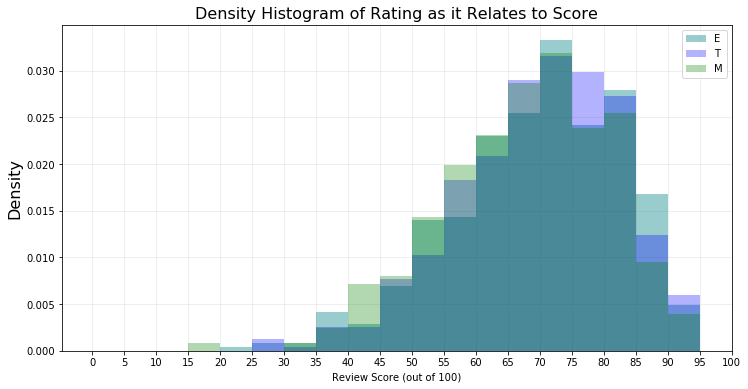

In [21]:
#Needs to be a DENSITY histogram, not just a normal 
fig, ax = plt.subplots(figsize=(12,6))
barwidth = 5

dfGamesRated_E = dfDirtyGames.loc[dfDirtyGames["Release.Rating"]=="E"]
dfGamesRated_T = dfDirtyGames.loc[dfDirtyGames["Release.Rating"]=="T"]
dfGamesRated_M = dfDirtyGames.loc[dfDirtyGames["Release.Rating"]=="M"]

my_bins = range(0,100,5)

dfGamesRated_E.hist(column="Metrics.Review Score", histtype='bar', ax=ax, facecolor="teal", width = barwidth, bins=my_bins, label="E", density=True, alpha=0.4)
dfGamesRated_T.hist(column="Metrics.Review Score",  histtype='bar', ax=ax, facecolor="blue",  width = barwidth, bins=my_bins, label="T", density=True, alpha=0.3)
dfGamesRated_M.hist(column="Metrics.Review Score",  histtype='bar', ax=ax, facecolor="green", width = barwidth, bins=my_bins, label="M",  density=True, alpha=0.3)


#the brown on the bottom looks odd... but I suppose that's just the result of combination of colors. I'm not sure how to get rid of it, but if we're supposed to be plotting this
#on the same graph I hope it's enough to show the data. I've been playing around with it for a while, I hope this is right? 

ax.set_title("Density Histogram of Rating as it Relates to Score", fontsize=16)

ax.set_xlabel("Review Score (out of 100)")
ax.set_ylabel("Density", fontsize=16)


plt.xticks(np.arange(0, 100 + 5, 5)) #put ticks in y-axis to see more 


ax.grid(alpha=0.25)
ax.set_axisbelow(True)
ax.legend()

plt.show()

Interestingly, there is no obvious trends or outleirs here. Across the board, this means that there is no extreme variance in rating as it releates to rating. There's a bit of a spike in Teen games within the 75-80 range but aside from that nothing too abnormal. The games here all follow the same right-skewed bell-curve for review score, regardless of their ESRB rating. This is good! It means that games aren't going to be judged based on what target demographic they're for, and likely have an equal shot at being a great game regardless of rating!

-- 


**Part ???:**  *Does game's multi/singplayer functionality affect review score or used price?* 

From here, I'd like to do a quick take on multi vs. single player as it relates to review score. Theoretically, a reviewer or players experience with a multiplayer game can very wildy. With a single player game, many players are getting a similar experience, but with a multiplayer game, other players' interactions may drastically affect the way they few a game. But does this actually affect review score overall? For that, I'll create a density histogram of review score as it relates to single vs. multiplayer games


In [68]:
dfGamesSingleplayer = dfDirtyGames.loc[dfDirtyGames["Features.Max Players"]==1]
dfGamesMultiplayer = dfDirtyGames.loc[dfDirtyGames["Features.Max Players"]>1]

print("# of Single Player Games:", dfGamesSingleplayer["Features.Max Players"].count())
print("# of Multi Player Games:", dfGamesMultiplayer["Features.Max Players"].count())

# of Single Player Games: 834
# of Multi Player Games: 378


There are *far* more single player games than multiplayer games, so we'll need to take this into account when evaluating our samples

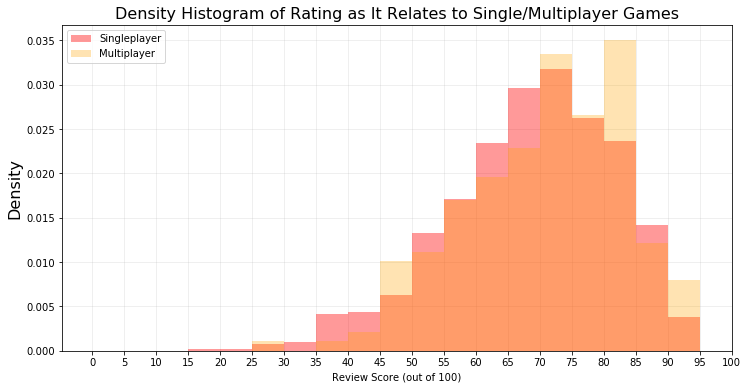

In [69]:
dfGamesSingleplayer = dfDirtyGames.loc[dfDirtyGames["Features.Max Players"]==1]
dfGamesMultiplayer = dfDirtyGames.loc[dfDirtyGames["Features.Max Players"]>1]


fig, ax = plt.subplots(figsize=(12,6))
barwidth = 5

my_bins = range(0,100,5)

dfGamesSingleplayer.hist(column="Metrics.Review Score", histtype='bar', ax=ax, facecolor="red", width = barwidth, bins=my_bins, label="Singleplayer", density=True, alpha=0.4)
dfGamesMultiplayer.hist(column="Metrics.Review Score",  histtype='bar', ax=ax, facecolor="orange",  width = barwidth, bins=my_bins, label="Multiplayer", density=True, alpha=0.3)

#the brown on the bottom looks odd... but I suppose that's just the result of combination of colors. I'm not sure how to get rid of it, but if we're supposed to be plotting this
#on the same graph I hope it's enough to show the data. I've been playing around with it for a while, I hope this is right? 

ax.set_title("Density Histogram of Rating as It Relates to Single/Multiplayer Games", fontsize=16)

ax.set_xlabel("Review Score (out of 100)")
ax.set_ylabel("Density", fontsize=16)


plt.xticks(np.arange(0, 100 + 5, 5)) #put ticks in y-axis to see more 


ax.grid(alpha=0.25)
ax.set_axisbelow(True)
ax.legend()

plt.show()


In [70]:
spMean = dfGamesSingleplayer["Metrics.Review Score"].mean()
mpMean = dfGamesMultiplayer["Metrics.Review Score"].mean()
spMedian = dfGamesSingleplayer["Metrics.Review Score"].median()
mpMedian = dfGamesMultiplayer["Metrics.Review Score"].median()

print("Single Player games mean: ", spMean, "  median: ", spMedian)
print("Multi Player games mean: ", mpMean, "  median: ", mpMedian)


Single Player games mean:  68.21702637889689   median:  70.0
Multi Player games mean:  70.17724867724868   median:  72.0


Interestingly, the multi-player games tend to score a little bit higher in some parts relative to density. Even though the means + medians of both are pretty close to each other, and the overall distribution is too, the multiplayer has a big spike in the 80-85 range in the density histogram. Despite having less games  in this dataset, it's quite interesting to note such a massive spike at this point! More games within the multiplayer genre score within this range!

Perhaps this is an indication of multiplayer games generally being of a certain quality or reviewing positively? It is likely that generally well-crafted multiplayer experiences could review better than subjective story or single-player experiences that all players may not enjoy, or might not connect with in the same way as a multiplayer game. 


*What about co-op vs. single-player vs multiplayer?*

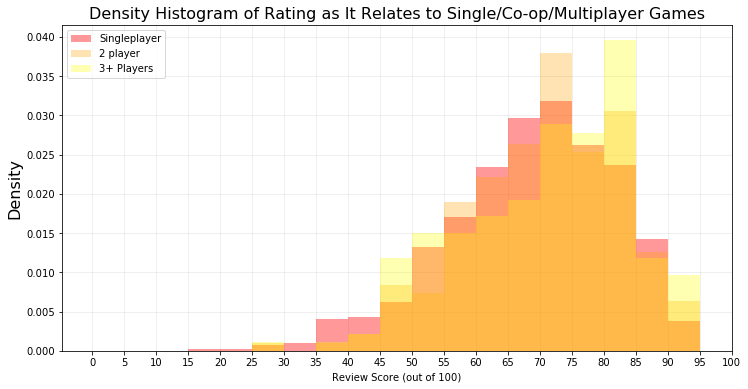

For reference: 
# of Single Player Games: 834
# of 2 Player Games: 191
# of 3+ Player Games: 187


In [67]:
dfGamesSingleplayer = dfDirtyGames.loc[dfDirtyGames["Features.Max Players"]==1]
dfGamesTwoplayer = dfDirtyGames.loc[dfDirtyGames["Features.Max Players"]==2]
dfGamesMultiplayer = dfDirtyGames.loc[dfDirtyGames["Features.Max Players"]>2]




fig, ax = plt.subplots(figsize=(12,6))
barwidth = 5

my_bins = range(0,100,5)

dfGamesSingleplayer.hist(column="Metrics.Review Score", histtype='bar', ax=ax, facecolor="red", width = barwidth, bins=my_bins, label="Singleplayer", density=True, alpha=0.4)
dfGamesTwoplayer.hist(column="Metrics.Review Score",  histtype='bar', ax=ax, facecolor="orange",  width = barwidth, bins=my_bins, label="2 player", density=True, alpha=0.3)
dfGamesMultiplayer.hist(column="Metrics.Review Score",  histtype='bar', ax=ax, facecolor="yellow",  width = barwidth, bins=my_bins, label="3+ Players", density=True, alpha=0.3)


#the brown on the bottom looks odd... but I suppose that's just the result of combination of colors. I'm not sure how to get rid of it, but if we're supposed to be plotting this
#on the same graph I hope it's enough to show the data. I've been playing around with it for a while, I hope this is right? 

ax.set_title("Density Histogram of Rating as It Relates to Single/Co-op/Multiplayer Games", fontsize=16)

ax.set_xlabel("Review Score (out of 100)")
ax.set_ylabel("Density", fontsize=16)


plt.xticks(np.arange(0, 100 + 5, 5)) #put ticks in y-axis to see more 


ax.grid(alpha=0.25)
ax.set_axisbelow(True)
ax.legend()

plt.show()


##For reference:
print("For reference: ")
print("# of Single Player Games:", dfGamesSingleplayer["Features.Max Players"].count())
print("# of 2 Player Games:", dfGamesTwoplayer["Features.Max Players"].count())
print("# of 3+ Player Games:", dfGamesMultiplayer["Features.Max Players"].count())

Again, this same trend of multi-player over single-player is still shown to be strong when comparing just 2-player co-op games (which score notably high in the 70-75 and 80-85 range) along with games that support 3+ players! It's interesting to note how much higher the overall distribution for this range of score for multiplayer games is! 

Yet again, this helps speak to the general trend that multiplayer games will likely score higher in the 80-85 range than most of the single-player games, the latter of which tend to have a bell-curve distribution! Perhaps multi-player games have a better shot of scoring very positively within this score range! 

 - **Important to note - there are singnificantly less multi-player games in this dataset than single player games. It should be noted that overall distribution may be affected by this slightly, however, we still felt it was interesting and worth discussing because of this massive spike*


___

### Review of Game Price and Game Length

**Examining How the Length of the Game Relates to its Price**


 *Exploring the Dollar per Hour of Gameplay Logic*
 
$\quad$ When it comes to games, some people consider "A Dollar Per Hour of Gameplay" (also sometimes referred to as the "Spoole's Rule") a good way to judge whether the amount content in a game is worth the price of the game. The theory says that a game can be defined as monetarily "good" if a player gets 1 hour of playtime at least for every US dollar spent on the game. For example, a player should expect 60 hours of gameplay from a sixty US dollar game. While this can be countered with the argument of "quality over quantity" it is still something that many people consider when purchasing a game.


$\quad$ Therefore, we wanted to examine the relationship between the price of the game and the average amount of hours spent on the game. For this analysis we will look at both the average length of all play styles (i.e. Playing leisurely, playing rushed, completing the game, speed runs, etc) and the average amout of time it takes the player to play through the game's main story line.


$\quad$ We compare the amount of time played to the re-sale value for a few reason. First of all, the dataset does not provide the games' release prices, but also, release prices tend to be the same across consoles regardless of length of the game, producer, ratings, etc.. On the other hand, we believed that a game's re-sale price would be more likely to be based off of the aforementioned traits. This along with the fact that the game has been out for a while in order to be resold, also more likely takes possible influences and price inflators (such as initial release hype, promotions, etc) out of the equation making the price hopefully closer to the price that the consumers think the game should be priced at.

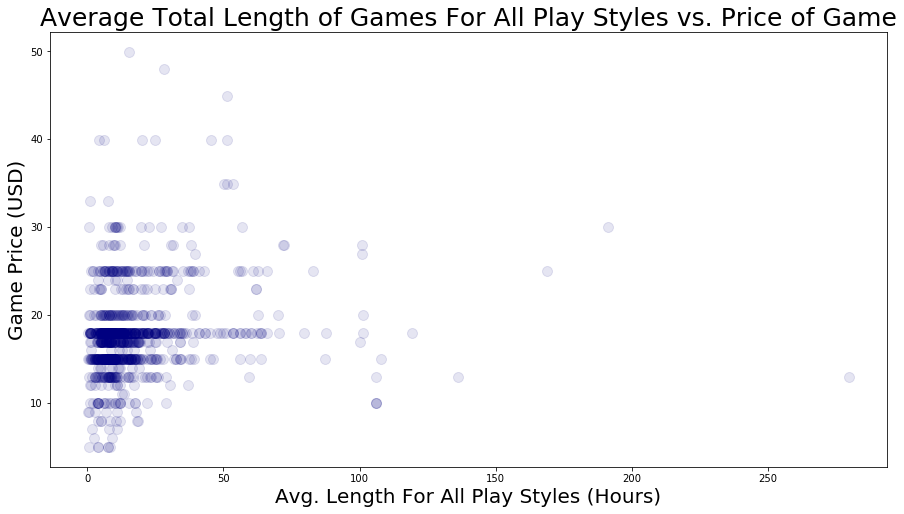

In [27]:
################
# IDKY all that is printing but -shrug-
################

xAxis = dfCleanLengthGames['Length.All PlayStyles.Average']
yAxis = dfDirtyGames["Metrics.Used Price"]


#Filter out all of the data for length which is 0.0, since this is empty/missing data: 
dfCleanLengthGames =  dfDirtyGames[(dfDirtyGames['Length.All PlayStyles.Average'] > 0)]

maxPrice = np.amax(dfCleanLengthGames["Metrics.Used Price"])
minPrice = np.amax(dfCleanLengthGames["Metrics.Used Price"])
maxLength = np.amax(dfCleanLengthGames['Length.All PlayStyles.Average'])
minLength = np.amax(dfCleanLengthGames['Length.All PlayStyles.Average'])


fig, ax = plt.subplots(figsize=(15,8))

ax.set_title("Average Total Length of Games For All Play Styles vs. Price of Game",fontsize=25)
ax.set_ylabel("Game Price (USD)",fontsize=20)
ax.set_xlabel("Avg. Length For All Play Styles (Hours)",fontsize=20)

yAxis = dfCleanLengthGames["Metrics.Used Price"]
xAxis = dfCleanLengthGames['Length.All PlayStyles.Average']

ax.scatter(xAxis, yAxis, color='Navy', s=100, alpha = 0.1)


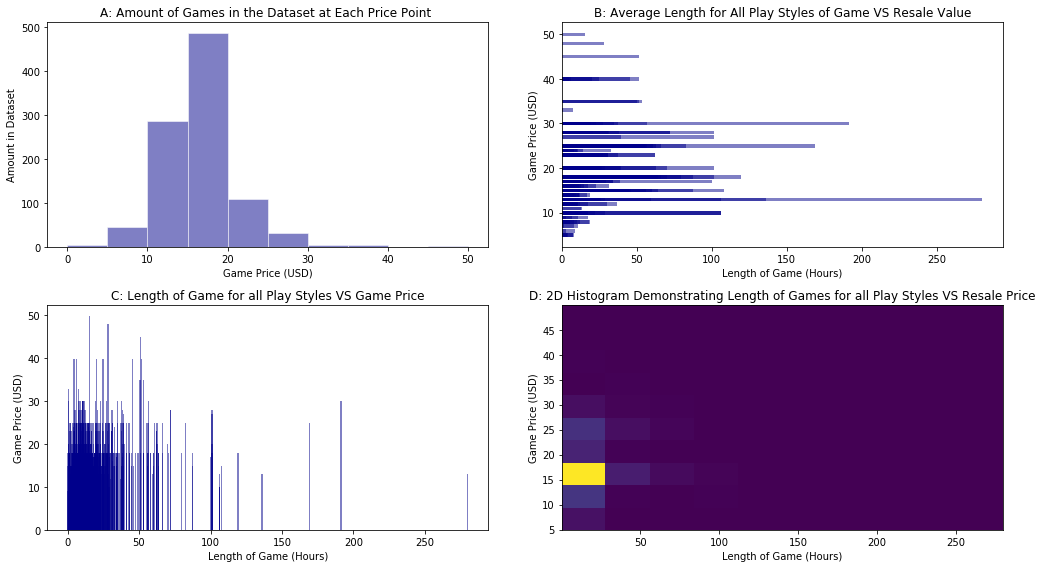

In [28]:
################
################

xAxis = dfCleanLengthGames['Length.All PlayStyles.Average']
yAxis =  dfCleanLengthGames["Metrics.Used Price"]


#Filter out all of the data for length which is 0.0, since this is empty/missing data: 
dfCleanLengthGames =  dfDirtyGames[(dfDirtyGames['Length.All PlayStyles.Average'] > 0)]

maxPrice = np.amax(dfCleanLengthGames["Metrics.Used Price"])
minPrice = np.amax(dfCleanLengthGames["Metrics.Used Price"])
maxLength = np.amax(dfCleanLengthGames['Length.All PlayStyles.Average'])
minLength = np.amax(dfCleanLengthGames['Length.All PlayStyles.Average'])

my_bins = range(0,55,5)

fig, axs = plt.subplots(2, 2, figsize=(15, 8))

axs[0, 0].hist(yAxis, color='DarkBlue', alpha = 0.5, histtype='bar', ec='white', bins = my_bins)
axs[0, 0].set_title('A: Amount of Games in the Dataset at Each Price Point ')
axs[0, 0].set_xlabel("Game Price (USD)")
axs[0, 0].set_ylabel("Amount in Dataset")

axs[0, 1].barh(yAxis, xAxis, color='DarkBlue', alpha = 0.5)
axs[0, 1].set_title('B: Average Length for All Play Styles of Game VS Resale Value')
axs[0, 1].set_ylabel("Game Price (USD)")
axs[0, 1].set_xlabel("Length of Game (Hours)")

axs[1, 0].bar(xAxis, yAxis, color='DarkBlue',  alpha = 0.5)
axs[1, 0].set_title('C: Length of Game for all Play Styles VS Game Price')
axs[1, 0].set_ylabel("Game Price (USD)")
axs[1, 0].set_xlabel("Length of Game (Hours)")

axs[1, 1].hist2d(xAxis, yAxis)
axs[1, 1].set_title('D: 2D Histogram Demonstrating Length of Games for all Play Styles VS Resale Price')
axs[1, 1].set_ylabel("Game Price (USD)")
axs[1, 1].set_xlabel("Length of Game (Hours)")

fig.tight_layout()
plt.show()


 
 - **Figure A)** This graph was included so that the reader could see where the majority of games in the dataset are priced for resale value. From looking at this graph, one can tell that most games in the set are resold for around 10 to 20 dollars. While this graph does not show a coorelation with the time of game play, it serves as a reference point and basis of comparison.
 
 - **Figure B)** This horizontal bar chart shows the relationship between the length of the game and the re-sale price of the game. As one can see, the majority of the games are valued at 20 USD or less and are at about 30 hours or less of game play. However, there are some outliers reaching over 250 hours played selling under 20 USD.
 
 - **Figure C)** This bar chart is the same as Figure B but is verticle and helps visualize how the majority of games are priced under 20 USD and have less than 50 hours of average gameplay for all play styles. 
 
 - **Figure D)** This 2D Histogram also aims to show where the majority of games are priced and how long the majority of those games are. From looking at this figure, one can tell that the majority of games are betweet 14 and 18 USD and have 25 hours or less of average gameplay for all styles.
 
 
*What does this tell us about the relationship between the length of a game and it's average play time??*

$\quad$ While one may assume that the longer amount of time one can play the game would lead to higher prices because of there being more content while shorter games would lead to cheaper prices due to less content, the data shows that this doesn't always hold true. For example, the highest priced games (priced over 30 USD) recorded only max out around 50-60 hours of gameplay while games that are cheaper (under 30 USD) sometimes have twice the amount of hours played. Further more, the games that reach over 250 hours of game play are under 15 USD. Excluding the short games (under 25 hours) which sell for under 10 USD, the higher priced games seem to have some of the shorter playtimes. While much of the data does seem to satisfy the "1 hour of game play per 1 dollar spent" rule, from this data set, it is clear that more expensive games do not necessarily have longer game play times and cheaper games do not always have less play time. 

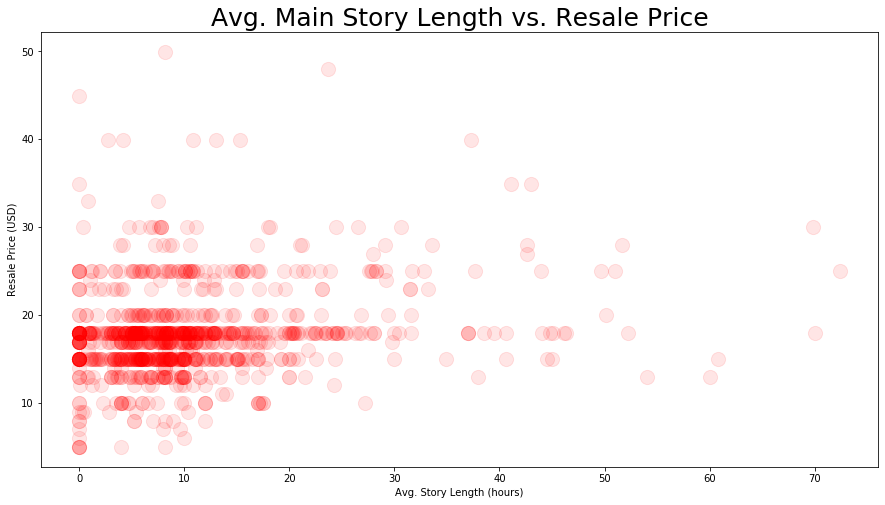

In [29]:


#Filter out all of the data for length which is 0.0, since this is empty/missing data: 
dfCleanLengthGamesSt =  dfDirtyGames[(dfDirtyGames['Length.Main Story.Average'] != 0.0)]

maxPrice = np.amax(dfCleanLengthGames["Metrics.Used Price"])
minPrice = np.amax(dfCleanLengthGames["Metrics.Used Price"])
maxLength = np.amax(dfCleanLengthGames['Length.Main Story.Average'])
minLength = np.amax(dfCleanLengthGames['Length.Main Story.Average'])


fig, ax = plt.subplots(figsize=(15,8))

ax.set_title("Avg. Main Story Length vs. Resale Price",fontsize=25)
ax.set_ylabel("Resale Price (USD)")
ax.set_xlabel("Avg. Story Length (hours)")

yAxis =  dfCleanLengthGames["Metrics.Used Price"]
xAxis = dfCleanLengthGames['Length.Main Story.Average']

ax.scatter(xAxis, yAxis, s=200, alpha=0.1, color='Red')


plt.show()


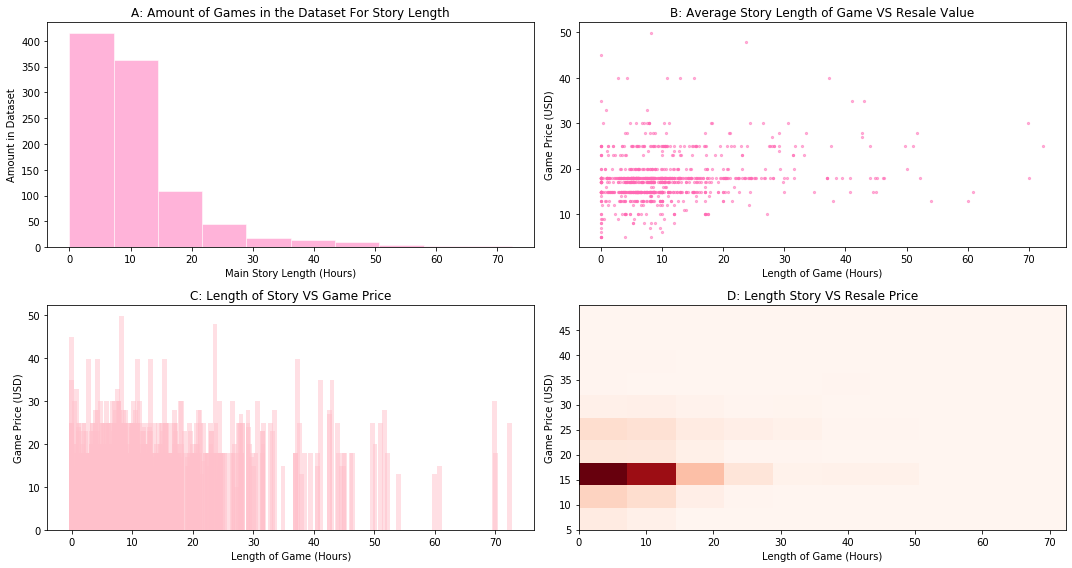

In [30]:
################
################
yAxis =  dfCleanLengthGames["Metrics.Used Price"]
xAxis = dfCleanLengthGames['Length.Main Story.Average']


#Filter out all of the data for length which is 0.0, since this is empty/missing data: 
dfCleanLengthGames =  dfDirtyGames[(dfDirtyGames['Length.All PlayStyles.Average'] > 0)]

maxPrice = np.amax(dfCleanLengthGames["Metrics.Used Price"])
minPrice = np.amax(dfCleanLengthGames["Metrics.Used Price"])
maxLength = np.amax(dfCleanLengthGames['Length.Main Story.Average'])
minLength = np.amax(dfCleanLengthGames['Length.Main Story.Average'])



fig, axs = plt.subplots(2, 2, figsize=(15, 8))

axs[0, 0].hist(xAxis, color='HotPink', alpha = 0.5, histtype='bar', ec='White')
axs[0, 0].set_title('A: Amount of Games in the Dataset For Story Length')
axs[0, 0].set_xlabel("Main Story Length (Hours)")
axs[0, 0].set_ylabel("Amount in Dataset")

axs[0, 1].scatter(xAxis, yAxis, color='HotPink', s=5, alpha = 0.5)
axs[0, 1].set_title('B: Average Story Length of Game VS Resale Value')
axs[0, 1].set_ylabel("Game Price (USD)")
axs[0, 1].set_xlabel("Length of Game (Hours)")

axs[1, 0].bar(xAxis, yAxis, color='Pink',  alpha = 0.5)
axs[1, 0].set_title('C: Length of Story VS Game Price')
axs[1, 0].set_ylabel("Game Price (USD)")
axs[1, 0].set_xlabel("Length of Game (Hours)")

axs[1, 1].hist2d(xAxis, yAxis, cmap=plt.cm.Reds)
axs[1, 1].set_title('D: Length Story VS Resale Price')
axs[1, 1].set_ylabel("Game Price (USD)")
axs[1, 1].set_xlabel("Length of Game (Hours)")


fig.tight_layout()
plt.show()